In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

import dpx_control_hw as dch
import dpx_energy_calibration

In [2]:
MODEL_FILE = '../models/calibration_large.h5'
PARAMETERS_FILE = '../models/parameters.json'
CONFIG = '../../measure/config_38.conf'

## Connect Dosepix

In [3]:
port = dch.find_port()
if port is None:
    port = '/dev/ttyACM0'

dpx = dch.Dosepix(
    port_name=port,
    config_fn=CONFIG,
    thl_calib_fn=None,
    params_fn=None,
    bin_edges_fn=None
)

## Energy Calibration

In [ ]:
dec = dpx_energy_calibration.DPXEnergyCalibration(
    dpx,
    MODEL_FILE,
    PARAMETERS_FILE
)

In [5]:
gen = dec.measure(
    frame_time=0.05,
    eval_after_frames=100
)

## Create interactive plots

### Distribution

In [6]:
fig_hist = go.FigureWidget()
for pixel in range(2, 14):
    fig_hist.add_trace(
        go.Scatter(
            x=[0],
            y=[0],
        )
    )
fig_hist

FigureWidget({
    'data': [{'type': 'scatter', 'uid': '5a3503f9-b024-482c-bce9-f1c3cd6594cb', 'x': [0], 'y': …

## Parameters

In [7]:
fig_params = go.FigureWidget(
    px.scatter(
        x=[0],
        y=[[0]]*4
    )
)
fig_params

FigureWidget({
    'data': [{'hovertemplate': 'variable=wide_variable_0<br>x=%{x}<br>value=%{y}<extra></extra>…

### Update Plots

In [ ]:
readouts = 0
params_history = []
while True:
    tot_x, tot_y, params_d = next(gen)

    # Distribution
    for pixel in range(16):
        fig_hist.data[pixel]['x'] = tot_x[pixel]
        fig_hist.data[pixel]['y'] = tot_y[pixel]

    # Parameters
    params_history.append( params_d )
    params = np.asarray(
        [params_history[idx]['mean'].tolist() for idx in range(len(params_history))]
    ).T
    params_err = np.asarray(
        [params_history[idx]['std'].tolist() for idx in range(len(params_history))]
    ).T

    for p_idx in range(4):
        fig_params.data[p_idx]['x'] = np.arange(readouts)
        fig_params.data[p_idx]['y'] = params[p_idx]
        fig_params.data[p_idx]['error_y'] = go.scatter.ErrorY(array=params_err[p_idx])
    readouts += 1

In [ ]:
for pixel in range(16):
    fig_hist.data[pixel]['x'] = tot_x[pixel]
    fig_hist.data[pixel]['y'] = tot_y[pixel]

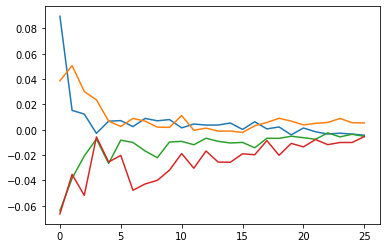

In [ ]:
for p_idx in range(4):
    plt.plot( np.diff(params[p_idx]) )